# We are trying to predict median value of house price in Boston

Import libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import dataset

In [47]:
dataset = pd.read_csv("BostonHousing.csv")

# Print head of the dataset

dataset.head()
#dataset.isna()

# Handling missing data
'''
from sklearn.impute import SimpleImputer
dataset = dataset.iloc[:,:].values
impute1 = SimpleImputer(missing_values = np.nan,strategy='mean')
impute2 = impute1.fit(dataset[:,:])
dataset[:,:] = impute2.fit_transform(dataset[:,:])
dataset.head()
'''
m = np.mean(dataset['rm'])
m
dataset['rm'] = dataset['rm'].replace(np.nan,m)
#dataset.head(15)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575000,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421000,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185000,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998000,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147000,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430000,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012000,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172000,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631000,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004000,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


visualising important characteristics of dataset

In [48]:
import seaborn as sns

sns.set(style = 'whitegrid',context = 'notebook')

C:\Users\AbuOsama\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


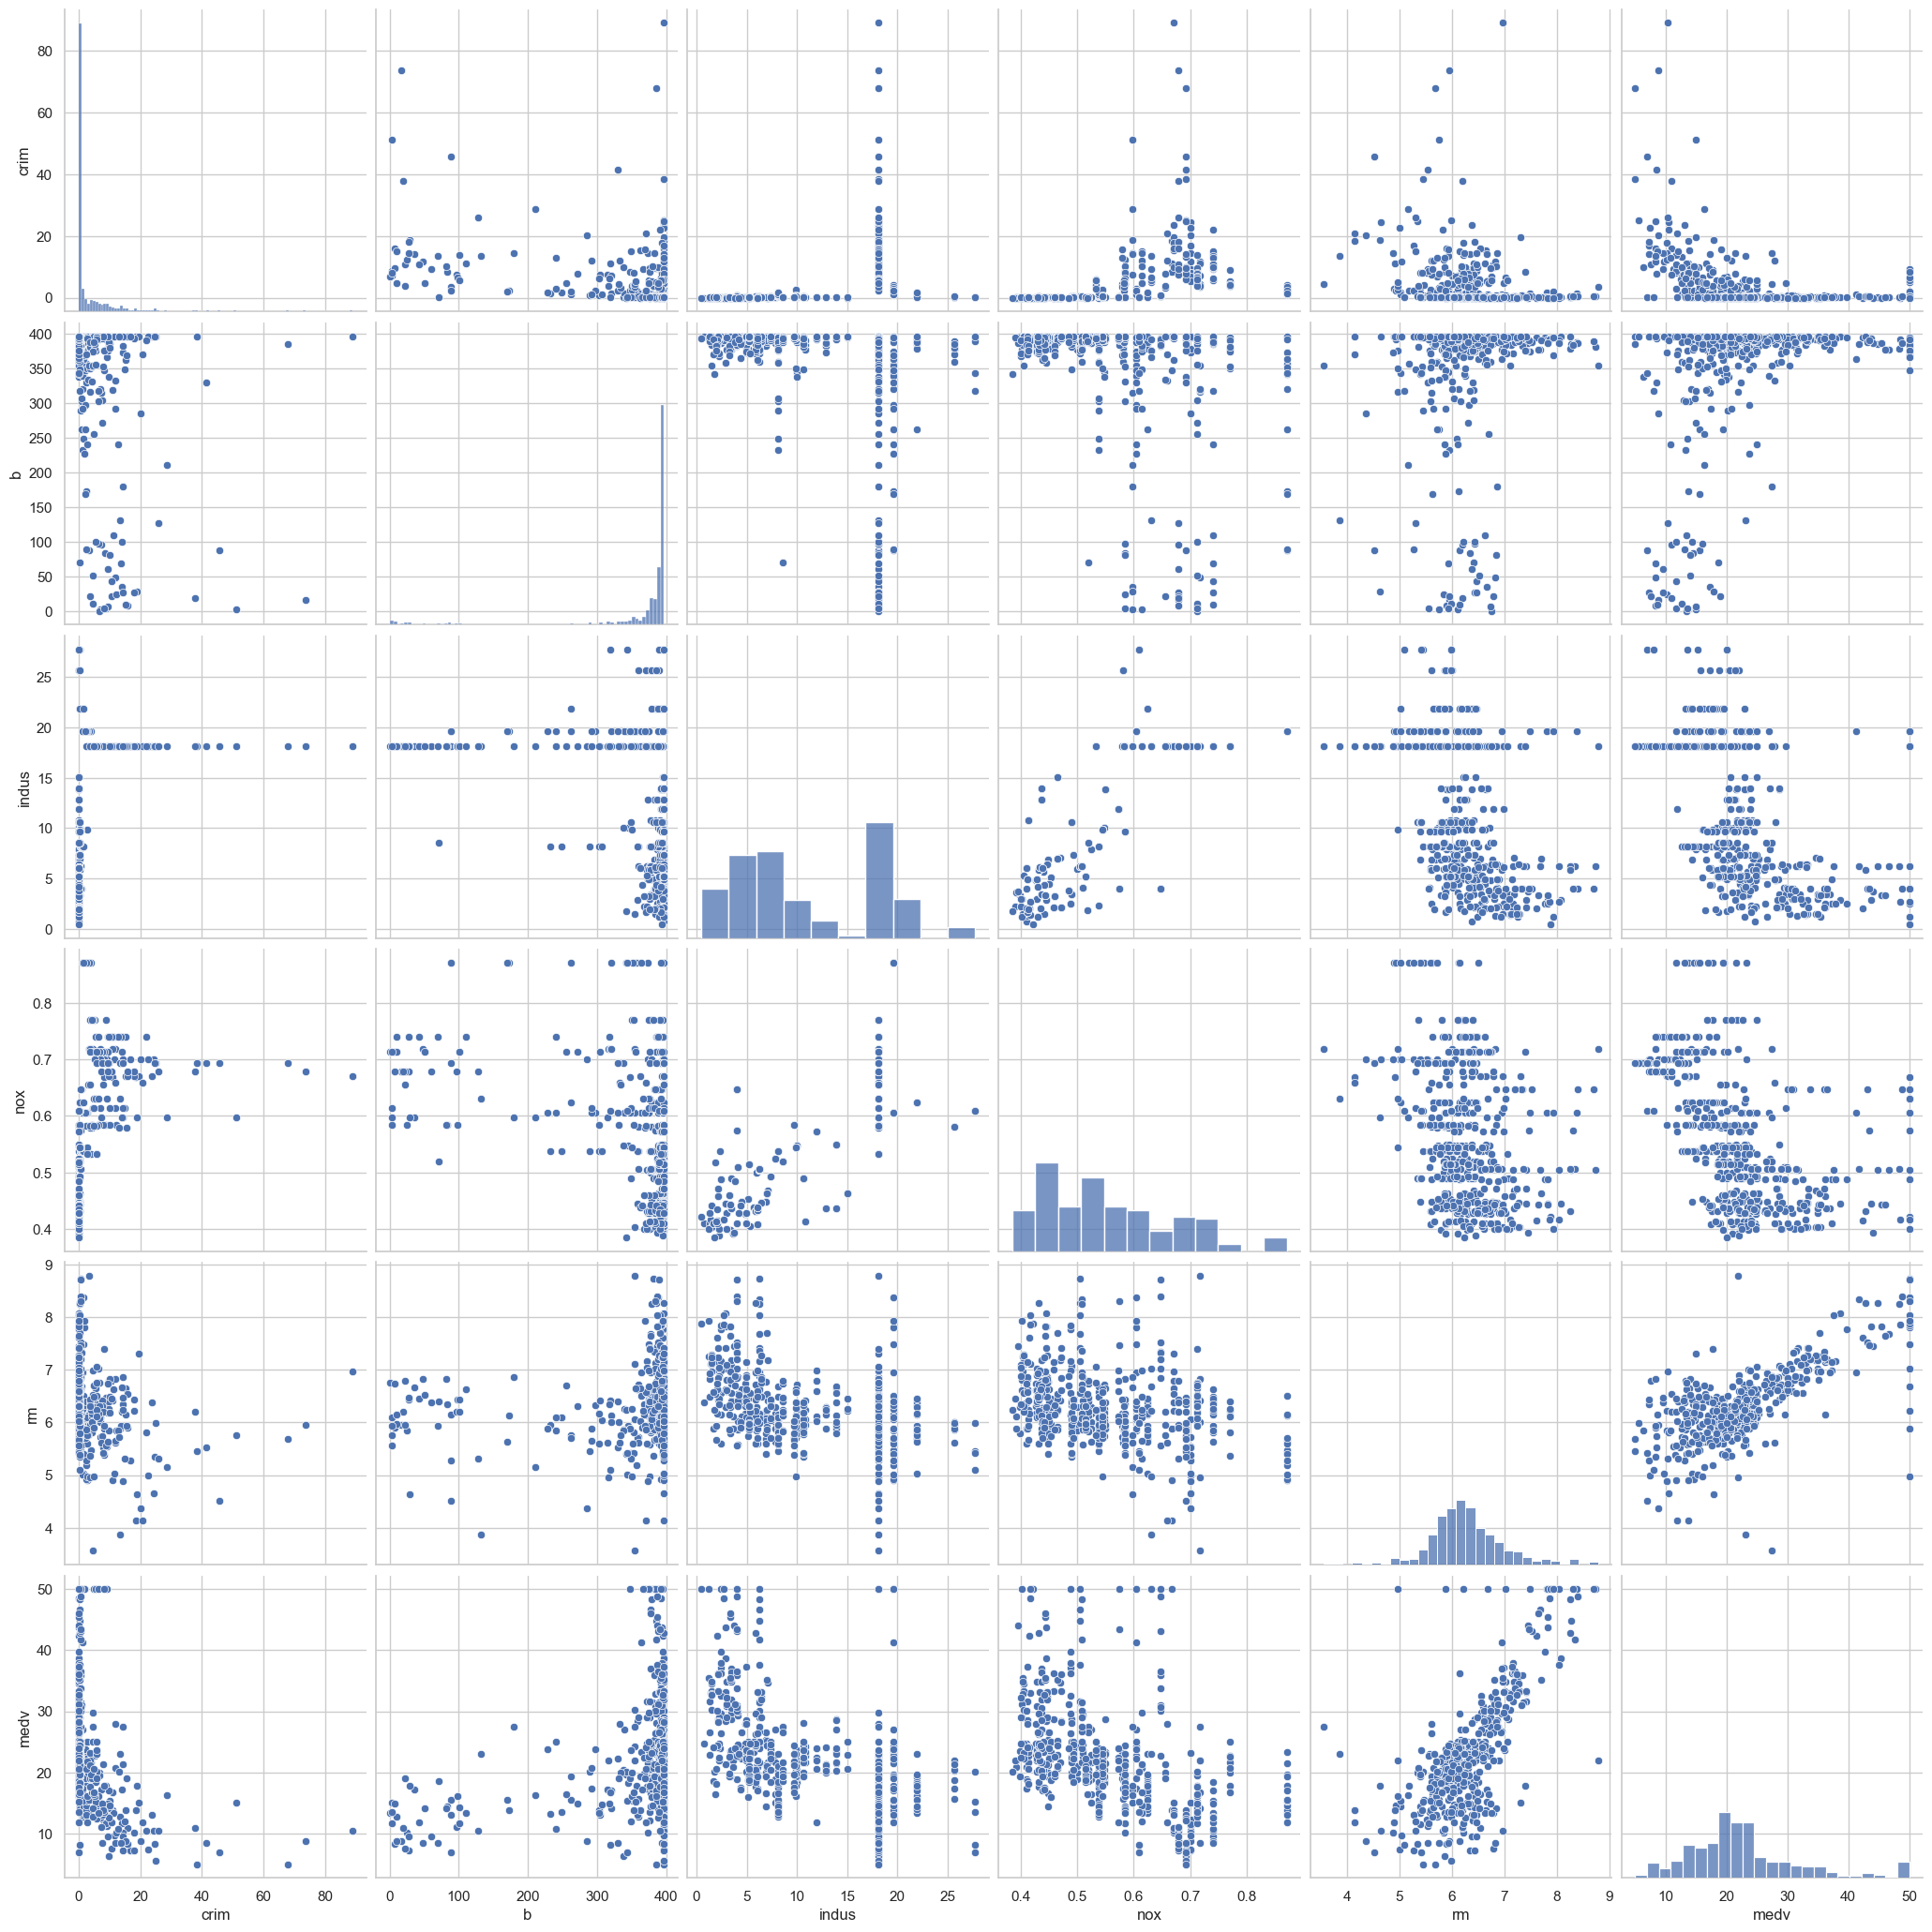

In [49]:
# Plots

cols = ['crim','b','indus','nox','rm','medv']

sns.pairplot(dataset[cols],height = 3.5)

plt.show()

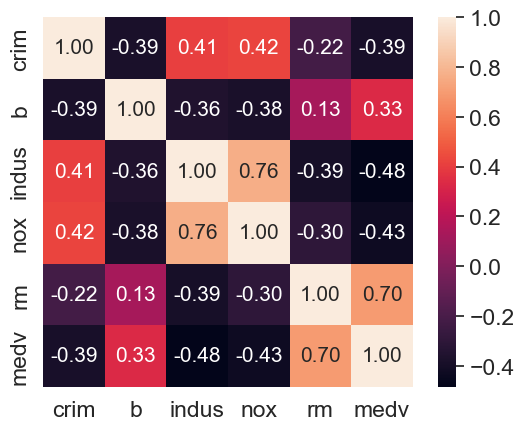

In [50]:
# Plotting correlations
# cm means correlation matrix
cm = np.corrcoef(dataset[cols].values.T)
#cm
sns.set(font_scale = 1.5)

sns.heatmap(data=cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},xticklabels=cols,yticklabels=cols)

plt.show()

##################################################################################################################

In [51]:
# Separating dataset

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,13].values

# Splitting dataset into training and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [52]:
# Fitting Multiple Linear Regression model on training set with sklearn

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(x_train,y_train)

LinearRegression()

In [53]:
regressor.coef_

array([-1.21247363e-01,  4.45719859e-02,  1.26585398e-02,  2.51315577e+00,
       -1.61867478e+01,  3.82963364e+00, -9.63010753e-03, -1.48887335e+00,
        2.44328013e-01, -1.11756602e-02, -1.01898200e+00,  6.82249632e-03,
       -4.88574552e-01])

In [54]:
regressor.intercept_

38.08044542083812

In [56]:
# Predictions

pred = regressor.predict(x_test)

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test,pred))
rmse

5.214344435208866

##############################################################################################################

In [66]:
# Now we will make multiple linear regression model with statsmodel library

import statsmodels.api as sm

# Add extra variable with 1's
xs = sm.add_constant(x)

In [63]:
# Split dataset because we added one new column of 1's name as xs

from sklearn.model_selection import train_test_split

x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(xs,y,test_size=0.3,random_state=0)

In [64]:
# Fit the model

import statsmodels.formula as smf
regressor_ols = sm.OLS(endog=y_train_s,exog=x_train_s).fit()

# Summary

regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     84.48
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           5.43e-98
Time:                        14:43:34   Log-Likelihood:                -1032.9
No. Observations:                 354   AIC:                             2094.
Df Residuals:                     340   BIC:                             2148.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0804      5.908      6.445      0.000      26.459      49.702
x1            -0.1212      0.038     -3.177      0.002      -0.196      -0.046
x2             0.0446      0.016      2.835      0.005       0.014       0.075
x3             0.0127      0.069      0.185      0.854      -0.122       0.148
x4             2.5132      1.013      2.480      0.014       0.520       4.507
x5           -16.1867      4.497     -3.600      0.000     -25.031      -7.342
x6             3.8296      0.493      7.764      0.000       2.859       4.800
x7            -0.0096      0.016     -0.610      0.542      -0.041       0.021
x8            -1.4889      0.235     -6.333      0.000      -1.951      -1.026
x9             0.2443      0.077      3.175      0.002       0.093       0.396
x10           -0.0112      0.004     -2.606      0.010      -0.020      -0.003
x11           -1.0190      0.150     -6.797      0.000      -1.314      -0.724
x12            0.0068      0.003      2.098      0.037       0.000       0.013
x13           -0.4886      0.061     -8.072      0.000      -0.608      -0.370
==============================================================================
Omnibus:                      132.199   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.941
Skew:                           1.535   Prob(JB):                    1.78e-134
Kurtosis:                       8.686   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# Predictions

pred1 = regressor_ols.predict(x_test_s)

# RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse1 = sqrt(mean_squared_error(y_test_s,pred1))
rmse1

5.214344435208873

In [68]:
# RMSE from sklearn
rmse

5.214344435208866

#####################################################################################################################

In [70]:
# Making optimal model with backword elimination method

x_opt = x_train_s[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

# Setp1

regressor_ols_b = sm.OLS(endog = y_train,exog=x_opt).fit()

regressor_ols_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     84.48
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           5.43e-98
Time:                        22:21:52   Log-Likelihood:                -1032.9
No. Observations:                 354   AIC:                             2094.
Df Residuals:                     340   BIC:                             2148.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0804      5.908      6.445      0.000      26.459      49.702
x1            -0.1212      0.038     -3.177      0.002      -0.196      -0.046
x2             0.0446      0.016      2.835      0.005       0.014       0.075
x3             0.0127      0.069      0.185      0.854      -0.122       0.148
x4             2.5132      1.013      2.480      0.014       0.520       4.507
x5           -16.1867      4.497     -3.600      0.000     -25.031      -7.342
x6             3.8296      0.493      7.764      0.000       2.859       4.800
x7            -0.0096      0.016     -0.610      0.542      -0.041       0.021
x8            -1.4889      0.235     -6.333      0.000      -1.951      -1.026
x9             0.2443      0.077      3.175      0.002       0.093       0.396
x10           -0.0112      0.004     -2.606      0.010      -0.020      -0.003
x11           -1.0190      0.150     -6.797      0.000      -1.314      -0.724
x12            0.0068      0.003      2.098      0.037       0.000       0.013
x13           -0.4886      0.061     -8.072      0.000      -0.608      -0.370
==============================================================================
Omnibus:                      132.199   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.941
Skew:                           1.535   Prob(JB):                    1.78e-134
Kurtosis:                       8.686   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# Remove INDUS or x3 variable since it has highest p-value

# Making optimal model with backword elimination method

x_opt = x_train_s[:,[0,1,2,4,5,6,7,8,9,10,11,12,13]]

# Setp1

regressor_ols_b = sm.OLS(endog = y_train,exog=x_opt).fit()

regressor_ols_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     91.78
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           5.63e-99
Time:                        23:08:49   Log-Likelihood:                -1032.9
No. Observations:                 354   AIC:                             2092.
Df Residuals:                     341   BIC:                             2142.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0030      5.885      6.458      0.000      26.428      49.578
x1            -0.1215      0.038     -3.192      0.002      -0.196      -0.047
x2             0.0443      0.016      2.833      0.005       0.014       0.075
x3             2.5312      1.007      2.513      0.012       0.550       4.513
x4           -15.9653      4.327     -3.689      0.000     -24.477      -7.453
x5             3.8218      0.491      7.787      0.000       2.857       4.787
x6            -0.0098      0.016     -0.620      0.536      -0.041       0.021
x7            -1.4986      0.229     -6.549      0.000      -1.949      -1.048
x8             0.2400      0.073      3.276      0.001       0.096       0.384
x9            -0.0108      0.004     -2.828      0.005      -0.018      -0.003
x10           -1.0145      0.148     -6.867      0.000      -1.305      -0.724
x11            0.0068      0.003      2.096      0.037       0.000       0.013
x12           -0.4876      0.060     -8.100      0.000      -0.606      -0.369
==============================================================================
Omnibus:                      132.333   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.030
Skew:                           1.536   Prob(JB):                    6.26e-135
Kurtosis:                       8.698   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
# Remove rm or x6 variable since it has highest p-value

# Making optimal model with backword elimination method

x_opt = x_train_s[:,[0,1,2,4,5,6,8,9,10,11,12,13]]

# Setp1

regressor_ols_b = sm.OLS(endog = y_train,exog=x_opt).fit()

regressor_ols_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     100.3
Date:                Thu, 04 Jan 2024   Prob (F-statistic):          6.64e-100
Time:                        23:12:47   Log-Likelihood:                -1033.1
No. Observations:                 354   AIC:                             2090.
Df Residuals:                     342   BIC:                             2137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.3188      5.858      6.542      0.000      26.797      49.840
x1            -0.1208      0.038     -3.176      0.002      -0.196      -0.046
x2             0.0456      0.016      2.938      0.004       0.015       0.076
x3             2.5023      1.005      2.489      0.013       0.525       4.480
x4           -16.7632      4.128     -4.061      0.000     -24.882      -8.644
x5             3.7590      0.480      7.835      0.000       2.815       4.703
x6            -1.4548      0.217     -6.690      0.000      -1.882      -1.027
x7             0.2436      0.073      3.338      0.001       0.100       0.387
x8            -0.0109      0.004     -2.852      0.005      -0.018      -0.003
x9            -1.0213      0.147     -6.938      0.000      -1.311      -0.732
x10            0.0067      0.003      2.062      0.040       0.000       0.013
x11           -0.5004      0.056     -8.863      0.000      -0.611      -0.389
==============================================================================
Omnibus:                      128.562   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.822
Skew:                           1.506   Prob(JB):                    1.12e-124
Kurtosis:                       8.443   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Since all p values are less than 0.05, no need to remove more variables

# Stop

In [73]:
# Final Model

regressor_ols_b = sm.OLS(endog = y_train,exog=x_opt).fit()

pred2 = regressor_ols_b.predict(x_test_s[:,[0,1,2,4,5,6,8,9,10,11,12,13]])

rmse2 = sqrt(mean_squared_error(y_test_s,pred2))

rmse2   # optimal model

5.200703647532461

In [74]:
rmse1     # model with all elements

5.214344435208873

#################################################################################################################

In [75]:
# Multicollinearity

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make subsets

data2 = dataset[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv']]

In [77]:
# Get x and y in dataframe df based a regression formula

y1,x1 = dmatrices('medv ~ crim + zn + indus + chas + nox + rm + age + dis +rad + tax + ptratio + b + lstat',data=data2,return_type ='dataframe')

In [80]:
# VIF
# Create empty dataframe called vif

vif = pd.DataFrame()
vif['Features'] = x1.columns
vif['VIF Scores'] = [variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]

In [81]:
vif

,Features,VIF Scores
0,Intercept,588.528899
1,crim,1.792197
2,zn,2.299248
3,indus,3.994000
4,chas,1.074004
5,nox,4.395452
6,rm,1.941401
7,age,3.099916
8,dis,3.963311
9,rad,7.480070


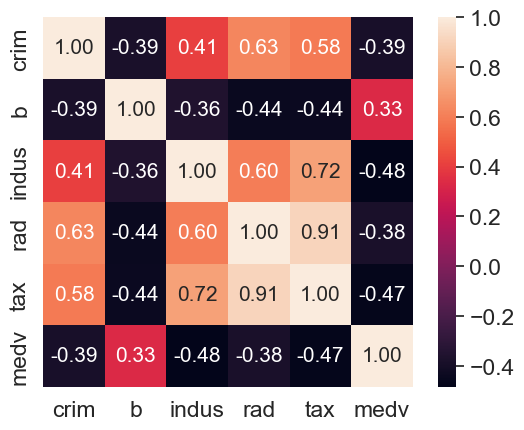

In [82]:
# Plotting correlations
cols1 = ['crim','b','indus','rad','tax','medv']

# cm means correlation matrix
cm1 = np.corrcoef(dataset[cols1].values.T)
#cm
sns.set(font_scale = 1.5)

sns.heatmap(data=cm1,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},xticklabels=cols1,yticklabels=cols1)

plt.show()